# ALY6040 - Assignment 1 - EXPLORATORY DATA ANALYSIS - Icecream Dataset - Daksh Shah.

Importing required libraries for the analysis

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
#!pip install category_encoders
import category_encoders as ce

Importing Dataset

In [107]:
ic = pd.read_csv("https://raw.githubusercontent.com/daksh-17/Exploratory-Data-Analysis---Using-python/main/KickstarterData_assignmet1.csv")

# Studying Data

In [108]:
ic.shape

(10000, 11)

Structure of the dataset

In [109]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Donate ID                             10000 non-null  int64  
 1   Donate Date                           10000 non-null  object 
 2   Gender                                10000 non-null  object 
 3   Deposit Amount                        9960 non-null   float64
 4   Preferred Color of Device             10000 non-null  object 
 5   Ice Cream Products Consumed Per Week  9896 non-null   float64
 6   Favorite Flavor Of Ice Cream          10000 non-null  object 
 7   Donated To Kick Starter Before        10000 non-null  object 
 8   Household Income                      5199 non-null   object 
 9   Do you own a Keurig                   10000 non-null  object 
 10  How many desserts do you eat a week   10000 non-null  int64  
dtypes: float64(2), i

A view at data set

In [110]:
ic.head(10)

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week
0,1,7/1/2019,female,100.0,white,4.0,vanilla,yes,<50K,yes,7
1,2,7/1/2019,female,100.0,blue,5.0,vanilla,yes,<50K,yes,5
2,3,7/1/2019,female,100.0,silver,6.0,vanilla,yes,<50K,yes,1
3,4,7/1/2019,female,100.0,silver,5.0,vanilla,yes,<50K,yes,4
4,5,7/1/2019,male,100.0,white,1.0,vanilla,yes,<50K,yes,7
5,6,7/1/2019,male,100.0,white,0.0,vanilla,yes,<50K,yes,9
6,7,7/1/2019,female,100.0,blue,2.0,vanilla,yes,<50K,yes,5
7,8,7/1/2019,female,100.0,black,5.0,vanilla,yes,<50K,yes,9
8,9,7/1/2019,male,100.0,blue,2.0,vanilla,yes,<50K,yes,7
9,10,7/1/2019,male,100.0,no preference,1.0,vanilla,yes,<50K,yes,5


Checking for NA values

In [111]:
ic.isna().sum()

Donate ID                                  0
Donate Date                                0
Gender                                     0
Deposit Amount                            40
Preferred Color of Device                  0
Ice Cream Products Consumed Per Week     104
Favorite Flavor Of Ice Cream               0
Donated To Kick Starter Before             0
Household Income                        4801
Do you own a Keurig                        0
How many desserts do you eat a week        0
dtype: int64

Summary of the Data

In [112]:
ic.describe()

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week
count,10000.00000,9960.000000,9896.000000,10000.000000
mean,5000.50000,141.069980,4.968876,5.060700
std,2886.89568,127.223283,3.175296,2.897008
min,1.00000,100.000000,0.000000,0.000000
25%,2500.75000,100.000000,2.000000,3.000000
50%,5000.50000,100.000000,5.000000,5.000000
75%,7500.25000,120.000000,8.000000,7.000000
max,10000.00000,10000.000000,10.000000,100.000000


# Cleaning the Data

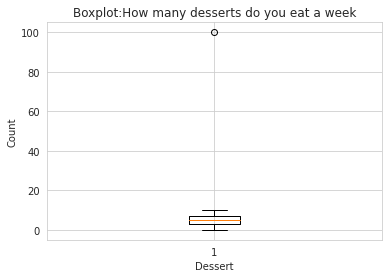

In [113]:
hdes = ic['How many desserts do you eat a week']
plt.boxplot(hdes)
plt.xlabel('Dessert')
plt.ylabel('Count')
plt.title('Boxplot:How many desserts do you eat a week')
plt.show()

In [114]:
ic.describe()

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week
count,10000.00000,9960.000000,9896.000000,10000.000000
mean,5000.50000,141.069980,4.968876,5.060700
std,2886.89568,127.223283,3.175296,2.897008
min,1.00000,100.000000,0.000000,0.000000
25%,2500.75000,100.000000,2.000000,3.000000
50%,5000.50000,100.000000,5.000000,5.000000
75%,7500.25000,120.000000,8.000000,7.000000
max,10000.00000,10000.000000,10.000000,100.000000


Removing the outliers by eliminating the observation from the study

In [115]:
nic = ic[ic['Deposit Amount'] != 10000]
nic = nic[nic['How many desserts do you eat a week'] != 100]
nic.shape

(9998, 11)

In [116]:
dep = nic['Deposit Amount']


Viewing Deposit amount distribution using histogram

[]

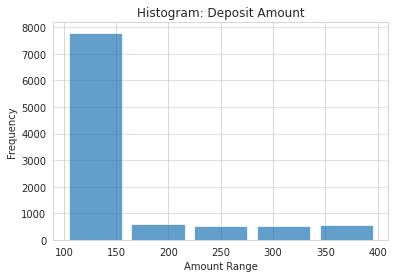

In [117]:
n, bins, patches = plt.hist(x = dep, bins=5, alpha=0.7, rwidth=0.85, range=(100, 400))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Amount Range')
plt.ylabel('Frequency')
plt.title('Histogram: Deposit Amount')
plt.plot()

Populating null values using mean

In [118]:
nic['Deposit Amount'] = nic['Deposit Amount'].fillna(nic['Deposit Amount'].mean())
nic.isna().sum()

Donate ID                                  0
Donate Date                                0
Gender                                     0
Deposit Amount                             0
Preferred Color of Device                  0
Ice Cream Products Consumed Per Week     104
Favorite Flavor Of Ice Cream               0
Donated To Kick Starter Before             0
Household Income                        4800
Do you own a Keurig                        0
How many desserts do you eat a week        0
dtype: int64

Viewing distribution of Ice cream products consumed per week using histogram

[]

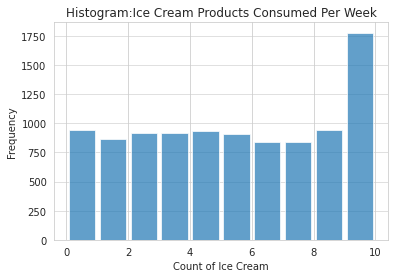

In [119]:
cons = nic['Ice Cream Products Consumed Per Week']
plt.hist(cons, alpha=0.7, rwidth=0.85, range=(0, 10))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Count of Ice Cream')
plt.ylabel('Frequency')
plt.title('Histogram:Ice Cream Products Consumed Per Week')
plt.plot()

Populating the Null values with Medain of the distribution

In [120]:
nic['Ice Cream Products Consumed Per Week'] = nic['Ice Cream Products Consumed Per Week'].fillna(nic['Ice Cream Products Consumed Per Week'].median())
nic.isna().sum()

Donate ID                                  0
Donate Date                                0
Gender                                     0
Deposit Amount                             0
Preferred Color of Device                  0
Ice Cream Products Consumed Per Week       0
Favorite Flavor Of Ice Cream               0
Donated To Kick Starter Before             0
Household Income                        4800
Do you own a Keurig                        0
How many desserts do you eat a week        0
dtype: int64

[]

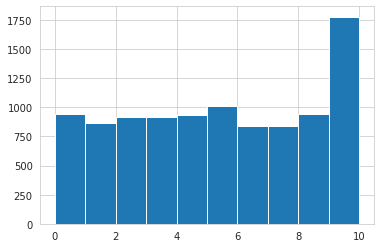

In [121]:
ncons = nic['Ice Cream Products Consumed Per Week']
plt.hist(ncons)
plt.plot()

Viewing the How many desserts do you eat a week column

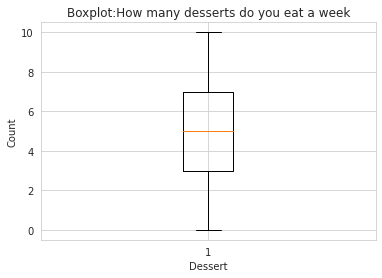

In [122]:
ndes = nic['How many desserts do you eat a week']
plt.boxplot(ndes)
plt.xlabel('Dessert')
plt.ylabel('Count')
plt.title('Boxplot:How many desserts do you eat a week')
plt.show()

Visualizing the Deposit amount based on Household income distributed based on gender to form a logic for handling the missing values of Household income

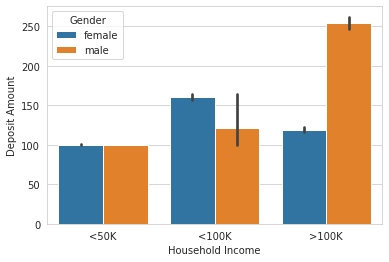

In [123]:
sb.barplot(x = nic['Household Income'], y = nic['Deposit Amount'], hue=nic['Gender'], data = nic) 

Handlling the missing values

In [124]:
s = nic['Deposit Amount'] <= 101
nic['Household Income'] = nic['Household Income'].fillna(s.map({True: '<50K', False: '>100K'}))

In [125]:
nic.isna().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
dtype: int64

Frequency table for Household income column

In [126]:
pd.crosstab(index = nic['Household Income'], columns='Count')

col_0,Count
Household Income,
<100K,2806
<50K,4592
>100K,2600


Visualization for choice of color based on gender

Text(0.5, 1.0, 'Bar Plot: Distribution of Color preference w.r.t. Gender')

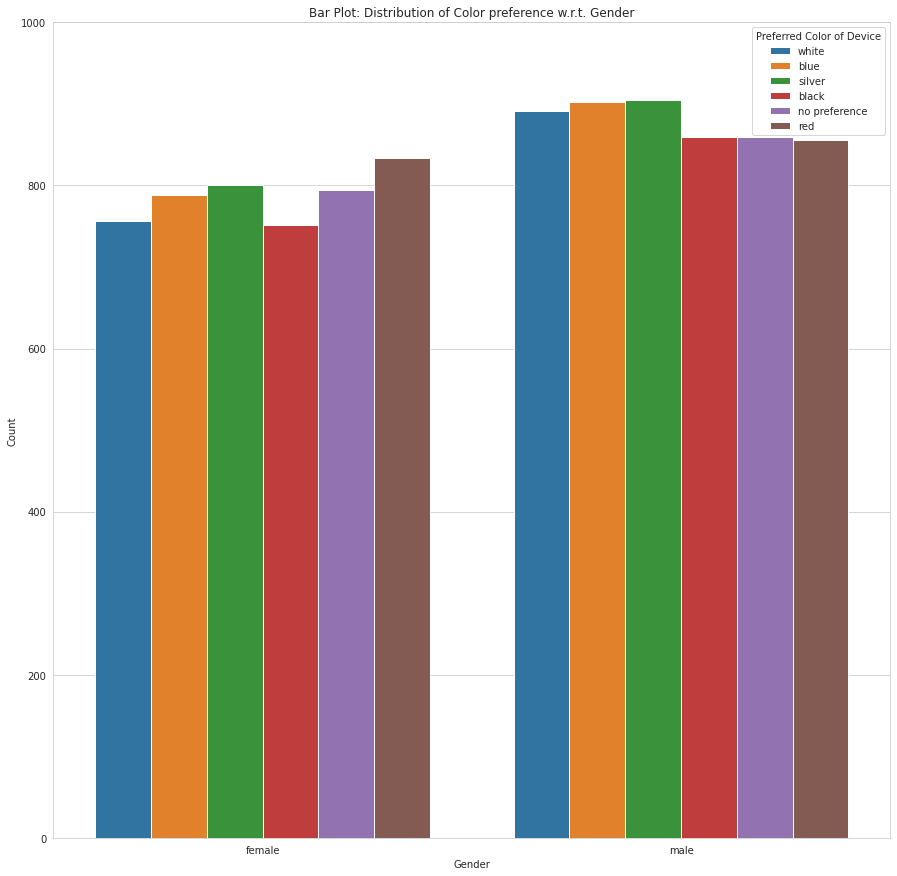

In [127]:
plt.figure(figsize=(15,15))
ax = sb.countplot (x = nic['Gender'], hue=nic['Preferred Color of Device'], 
                   data = nic)
ax.set_ylim(0,1000)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot: Distribution of Color preference w.r.t. Gender')

#plt.yticks(np.arange(min(nic['Preferred Color of Device']), max(nic['Preferred Color of Device'])+1, 50))

Overall donors based on household income

Text(0.5, 1.0, 'Bar Plot: Total donors based on Household Income')

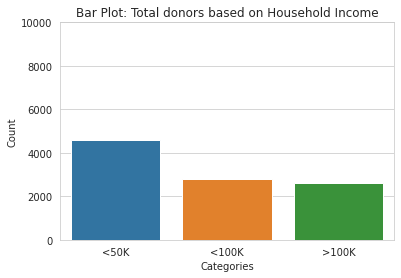

In [128]:
z = sb.countplot(x = nic['Household Income'], data = nic) 
z.set_ylim(0,10000)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot: Total donors based on Household Income')

Total amount donated by each household type

Text(0.5, 1.0, 'Bar Plot: Total Amount donated based on Household Income')

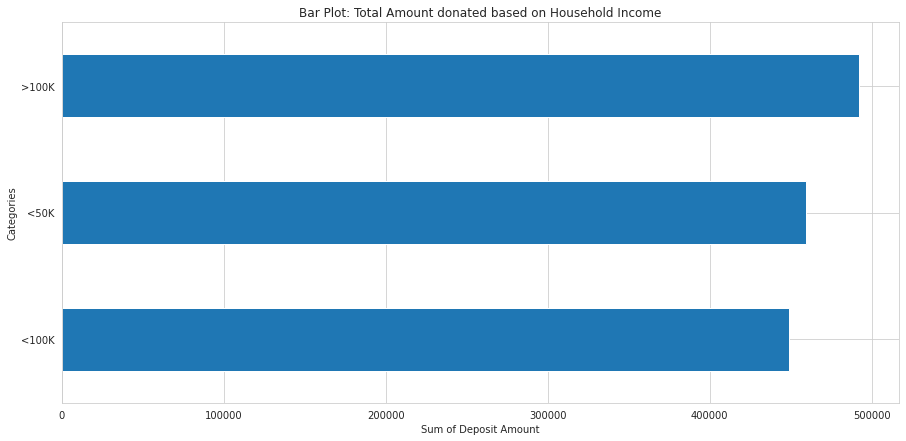

In [129]:
from IPython.core.pylabtools import figsize
fig, lp = plt.subplots(figsize=(15,7))
nic.groupby(['Household Income']).sum()['Deposit Amount'].plot.barh(ax=lp)
plt.ylabel('Categories')
plt.xlabel('Sum of Deposit Amount')
plt.title('Bar Plot: Total Amount donated based on Household Income')

## Data encoding for Building the Heatmap for correlation test.

In [130]:
nic['Gender_n'] = nic['Gender']
encoder = ce.OrdinalEncoder(cols=['Gender_n'], return_df=True,
                            mapping=[{'col':'Gender_n',
'mapping':{'male':0,'female':1}}])
nnic = encoder.fit_transform(nic)
#dum1 = pd.get_dummies(nic['Gender'])


In [131]:
#dum2 = pd.get_dummies(nic['Favorite Flavor Of Ice Cream'])
nnic['Favorite Flavor'] = nic['Favorite Flavor Of Ice Cream']
encoder1 = ce.OrdinalEncoder(cols=['Favorite Flavor'], return_df=True,
                            mapping=[{'col':'Favorite Flavor',
'mapping':{'no preference':0,'chocolate':1,'specialty':2, 'swirl':3, 'vanilla':4}}])
nnic = encoder1.fit_transform(nnic)
#dum3 = pd.get_dummies(nic['Household Income'])
#dum4 = pd.get_dummies(nic['Preferred Color of Device'])

In [132]:
nnic['Household_income'] = nic['Household Income']
encoder2 = ce.OrdinalEncoder(cols=['Household_income'], return_df=True,
                            mapping=[{'col':'Household_income',
'mapping':{'<50K':0,'<100K':1,'>100K':2}}])
nnic = encoder2.fit_transform(nnic)

In [133]:
nnic['Color_Device'] = nic['Preferred Color of Device']
encoder3 = ce.OrdinalEncoder(cols=['Color_Device'], return_df=True,
                            mapping=[{'col':'Color_Device',
'mapping':{'no preference':0,'black':1,'blue':2,'red':3,'silver':4,'white':5}}])
nnic = encoder3.fit_transform(nnic)
Ic_final = nnic.drop(['Donate ID'], axis=1)

In [134]:
#nic = nic.merge(dum1, left_index=True, right_index=True)
#nic = nic.merge(dum2, left_index=True, right_index=True)
#nic = nic.merge(dum3, left_index=True, right_index=True)
#nic = nic.merge(dum4, left_index=True, right_index=True)
Ic_final.head()

,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Gender_n,Favorite Flavor,Household_income,Color_Device
0,7/1/2019,female,100.0,white,4.0,vanilla,yes,<50K,yes,7,1,4,0,5
1,7/1/2019,female,100.0,blue,5.0,vanilla,yes,<50K,yes,5,1,4,0,2
2,7/1/2019,female,100.0,silver,6.0,vanilla,yes,<50K,yes,1,1,4,0,4
3,7/1/2019,female,100.0,silver,5.0,vanilla,yes,<50K,yes,4,1,4,0,4
4,7/1/2019,male,100.0,white,1.0,vanilla,yes,<50K,yes,7,0,4,0,5


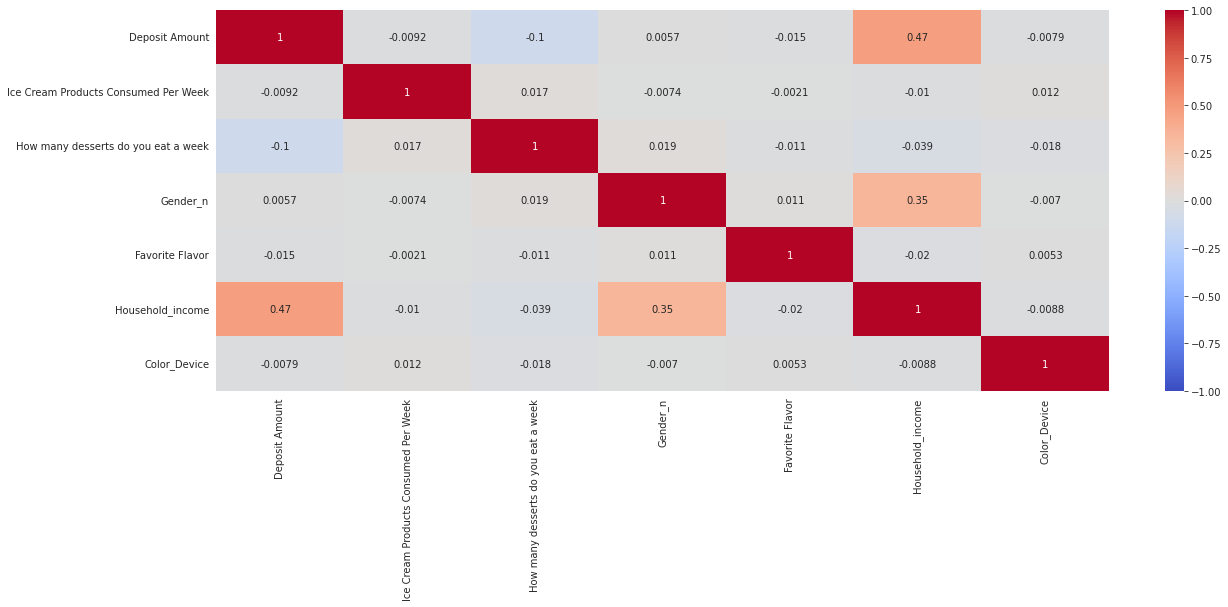

In [135]:
corr = Ic_final.corr()
ax , fig  = plt.subplots(figsize =(20,7))
sb.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()